In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import re
from models import *
from plot_utils import *
from math import ceil
import matplotlib.pyplot as plt


In [2]:
plt.rcParams['figure.figsize'] = (10, 6.5)
plt.rcParams['font.size'] = 29
plt.rcParams['font.weight'] = 500
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 29
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['legend.fontsize'] = 29
plt.rcParams['lines.markersize'] = 11
plt.rcParams['lines.linewidth'] = 4

sns.set_style('ticks')
sns.set_palette('Paired', 10)

In [3]:
rmse_df = pd.read_csv('rmse.csv')
sampling_df = pd.read_csv('../decision-rule/simdex-decision-rule.csv')

simdex_netflix_df = pd.read_csv('timing-results/netflix-simdex-timing.csv')
blocked_mm_netflix_df = pd.read_csv('timing-results/netflix-blocked_mm-timing.csv')

simdex_kdd_df = pd.read_csv('timing-results/kdd-simdex-timing.csv')
blocked_mm_kdd_df = pd.read_csv('timing-results/kdd-blocked_mm-timing.csv')

simdex_r2_df = pd.read_csv('timing-results/r2-simdex-timing.csv')
blocked_mm_r2_df = pd.read_csv('timing-results/r2-blocked_mm-timing.csv')

simdex_df = pd.concat([simdex_netflix_df, simdex_kdd_df, simdex_r2_df])
lemp_df = pd.read_csv('timing-results/lemp-gold-standard-timing.csv')
blocked_mm_df = pd.concat([blocked_mm_netflix_df, blocked_mm_kdd_df, blocked_mm_r2_df])
both_df = pd.concat([simdex_df, blocked_mm_df])

fexipro_df_all = pd.read_csv('timing-results/fexipro-orig-timing.csv')
fexipro_df = fexipro_df_all.query('alg == "SIR"')
fexipro_si_df = fexipro_df_all.query('alg == "SI"')

fexipro_estimates = pd.read_csv('runtime-estimates/fexipro.csv')
lemp_estimates = pd.read_csv('runtime-estimates/lemp.csv')
simdex_estimates = pd.read_csv('runtime-estimates/simdex.csv')
blocked_mm_esitmates = pd.read_csv('runtime-estimates/blocked_mm.csv')

In [4]:
print(simdex_df.query('model == "nomad-R2-50-reg-0.000001" and K == 1')['comp_time'].min())
print(lemp_df.query('model == "nomad-R2-50-reg-0.000001" and K == 1')['comp_time'].min())
print(blocked_mm_df.query('model == "nomad-R2-50-reg-0.000001" and K == 1')['comp_time'].min())


239.577
277.264
1044.38


In [5]:
print(blocked_mm_df.query('model == "nomad-Netflix-25-reg-0.05" and K == 1')['comp_time'].min())
print(lemp_df.query('model == "nomad-Netflix-25-reg-0.05" and K == 1')['comp_time'].min())
print(fexipro_si_df.query('model == "nomad-Netflix-25-reg-0.05" and K == 1')['comp_time'].min())

23.1927
42.8341
71.910119


In [6]:
temp = simdex_df.sort_values(by='comp_time').groupby(
        ['model', 'K'], as_index=False).first().drop(['num_threads','num_latent_factors',
                                                     'num_bins','sample_percentage',
                                                      'num_iters', 'parse_time'], axis=1)
max((temp['cluster_time'] / temp['comp_time'])*100)

11.792082164668956

FU Plots
Appetizer plots
RMSE plots


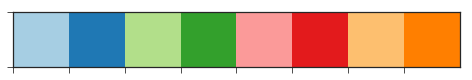

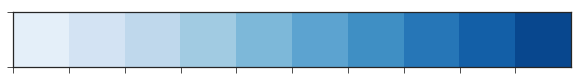

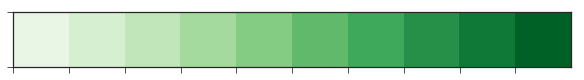

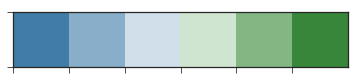

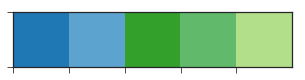

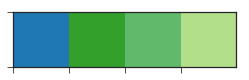

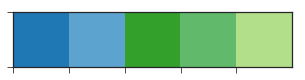

In [7]:
palette = sns.color_palette('Paired', 4)
blue_palette = sns.color_palette('Blues', 10)
green_palette = sns.color_palette('Greens', 10)
f_u_palette = [palette[1], blue_palette[-5], palette[3], green_palette[-5], palette[2]]
# appetizer_palette = [palette[1], palette[3]]
appetizer_palette = f_u_palette[0:1] + f_u_palette[2:]
# rmse_reg_palette = [palette[1], palette[0], palette[3]]
rmse_reg_palette = f_u_palette #[blue_palette[-5], palette[0], palette[3], green_palette[-5], palette[2]]
# rmse_reg_palette = [f_u_palette[3], f_u_palette[1], f_u_palette[4], f_u_palette[2], f_u_palette[5]]

sns.palplot(sns.color_palette('Paired', 8))
sns.palplot(sns.color_palette('Blues', 10))
sns.palplot(sns.color_palette('Greens', 10))
sns.palplot(sns.diverging_palette(240, 128, n=6))
print('FU Plots')
sns.palplot(f_u_palette)
print('Appetizer plots')
sns.palplot(appetizer_palette)
print('RMSE plots')
sns.palplot(rmse_reg_palette)

/Users/fabuzaid/Documents/simdex/code/plots/plot_utils.py:655: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  blocked_mm_rt['algo'] = 'Blocked MM'
/Users/fabuzaid/Documents/simdex/code/plots/plot_utils.py:658: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  lemp_rt['algo'] = 'LEMP'
/Users/fabuzaid/Documents/simdex/code/plots/plot_utils.py:661: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

lemp-paper-Netflix-noav-10 [  1.27318606e-05   1.30035751e-05   1.42163275e-05   1.69681237e-05]
1 512 1
5 1024 1
10 1024 1
50 1024 1
lemp-paper-Netflix-noav-50 [  3.38260756e-06   3.63154326e-06   3.69756766e-06   4.42273321e-06]
1 4096 1
5 4096 1
10 4096 1
50 4096 2
lemp-paper-Netflix-noav-100 [  3.44984854e-06   3.62720452e-06   3.71129667e-06   4.25965035e-06]
1 4096 1
5 4096 1
10 4096 1
50 4096 8
lemp-paper-KDD-50 [  9.88453453e-07   1.00731711e-06   1.00996957e-06   1.01044129e-06]
1 4096 8
5 4096 8
10 4096 8
50 4096 8
nomad-Netflix-10-reg-0.05 [  1.23216224e-05   1.26901074e-05   1.31145601e-05   1.69751617e-05]
1 1024 1
5 1024 1
10 256 1
50 1024 1
nomad-Netflix-25-reg-0.05 [  4.55043983e-06   4.70977048e-06   5.14759730e-06   6.44686229e-06]
1 1024 1
5 1024 1
10 1024 1
50 1024 1
nomad-Netflix-50-reg-0.05 [  3.42871354e-06   3.68187561e-06   3.58065927e-06   4.51128882e-06]
1 1024 1
5 1024 1
10 1024 1
50 1024 1
nomad-Netflix-100-reg-0.05 [  3.47956146e-06   3.62403616e-06   3.60

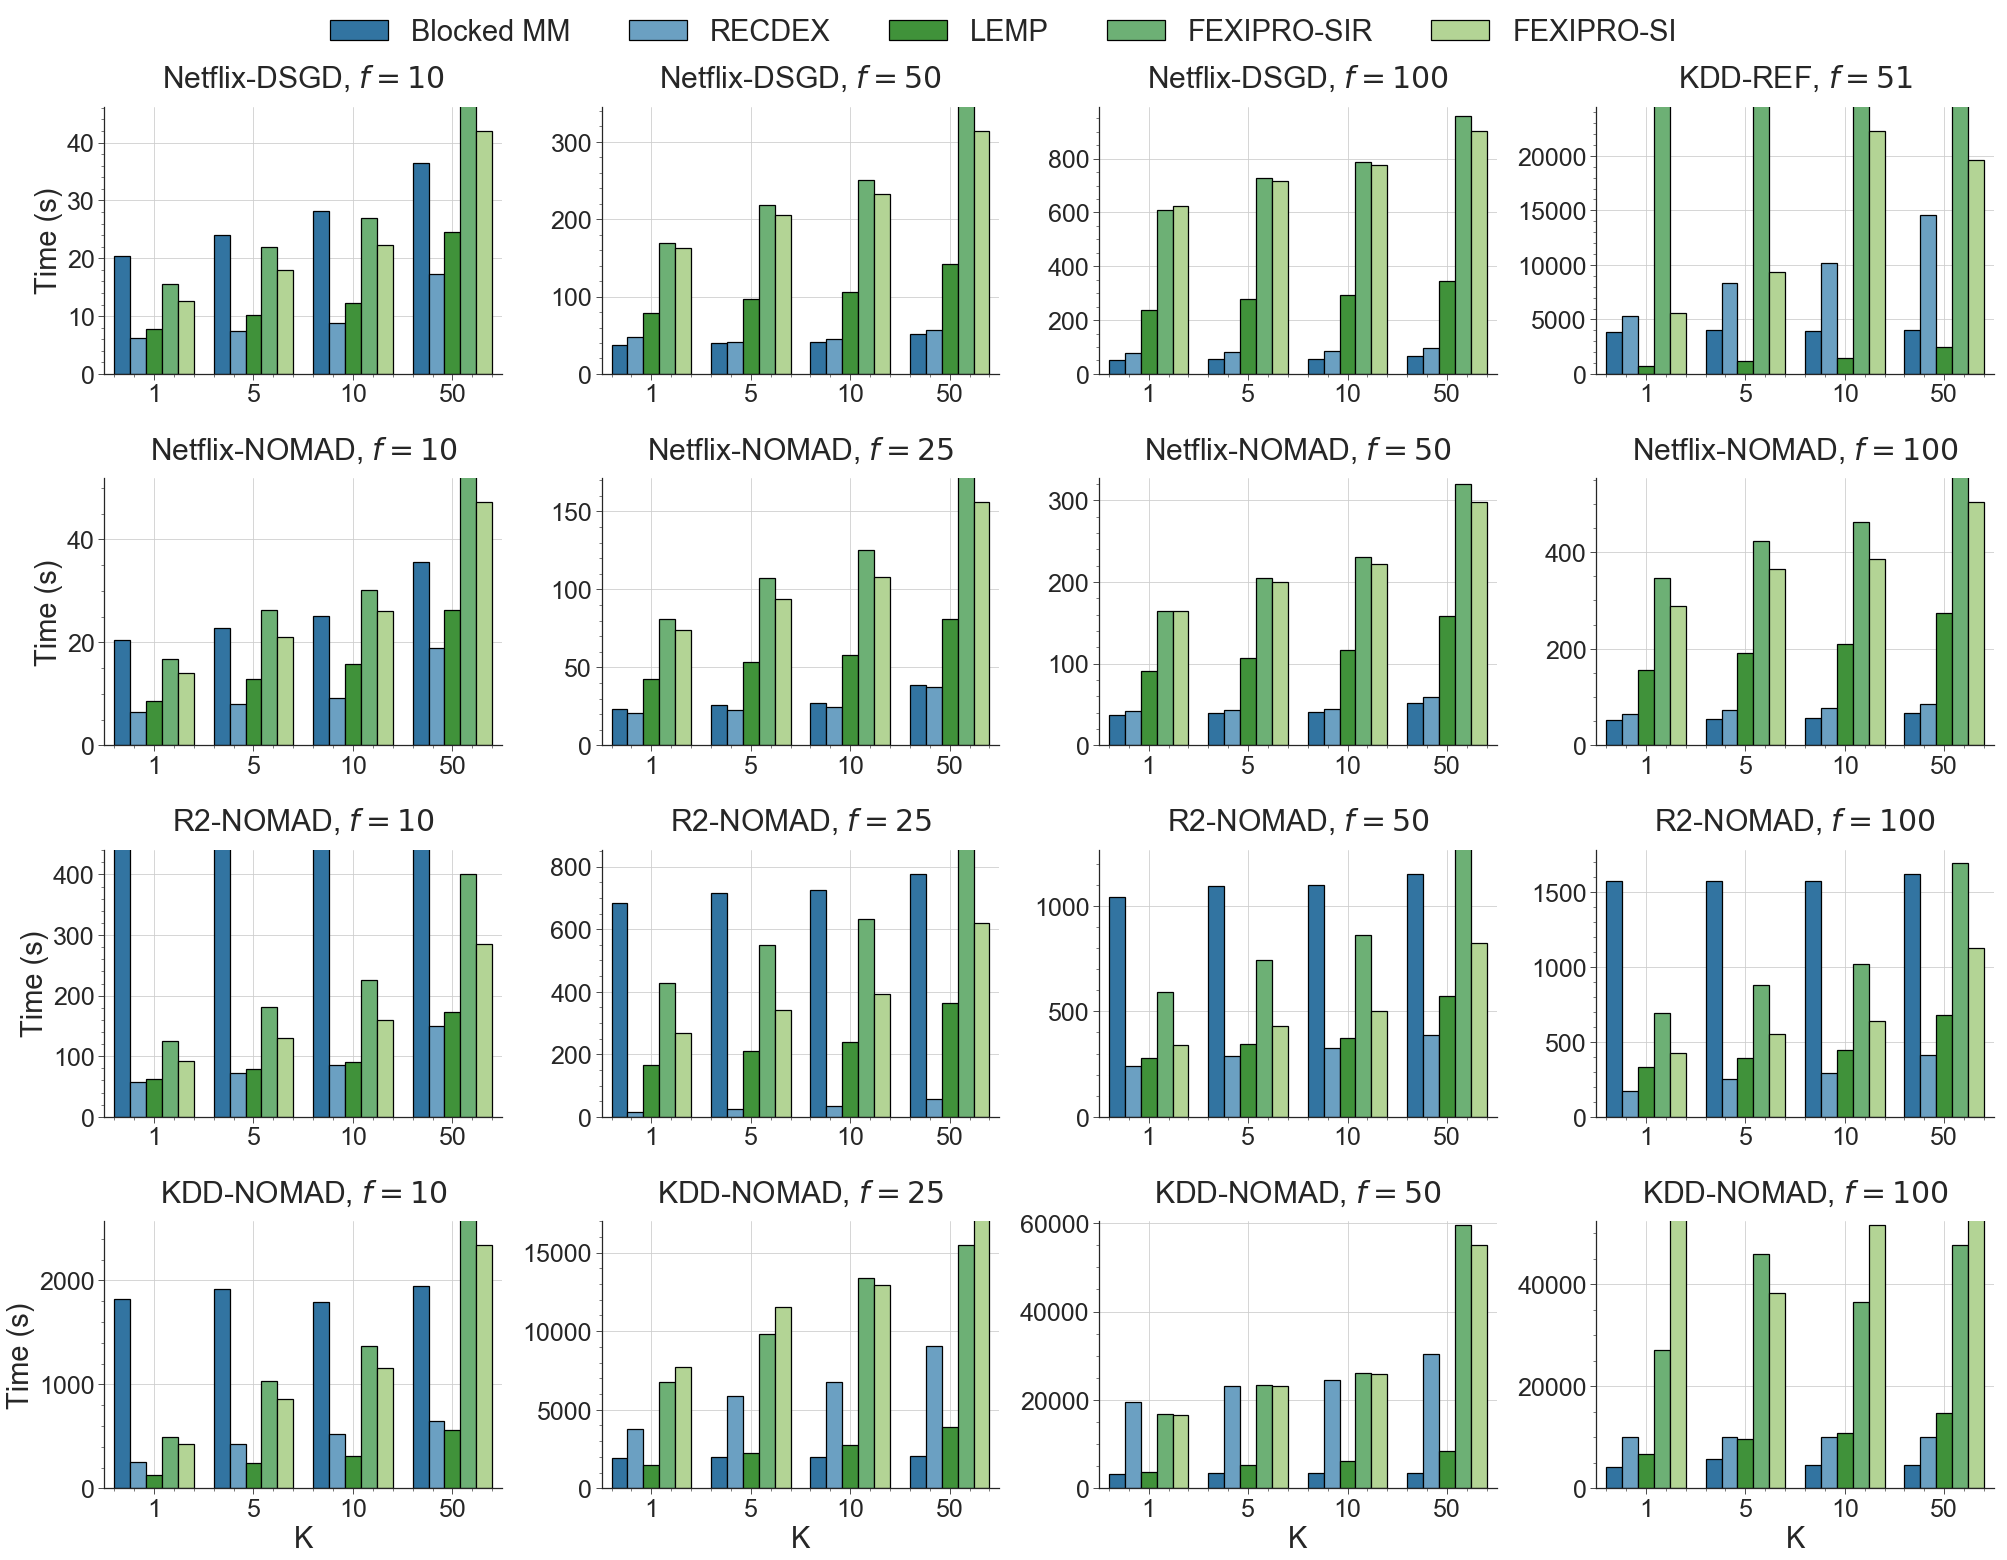

In [8]:
with sns.color_palette(f_u_palette):
    f_u_plots(simdex_df, lemp_df, blocked_mm_df, fexipro_df, fexipro_si_df, sampling_df,
              GOLD_STANDARD_MODELS, figsize=(28, 21), # 15
              bbox_to_anchor=(0,0,1, 1.04), nrows=4) # 1.06

/Users/fabuzaid/Documents/simdex/code/plots/plot_utils.py:351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  blocked_mm_rt['algo'] = 'Blocked MM'
/Users/fabuzaid/Documents/simdex/code/plots/plot_utils.py:354: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  lemp_rt['algo'] = 'LEMP'
/Users/fabuzaid/Documents/simdex/code/plots/plot_utils.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

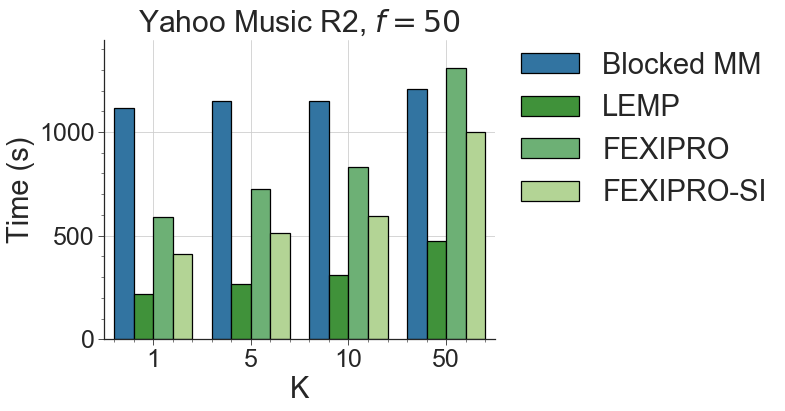

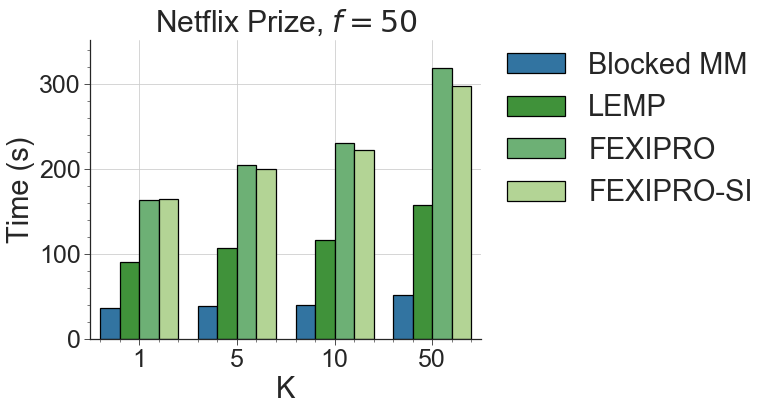

In [9]:
with sns.color_palette(appetizer_palette):
    blocked_mm_lemp_fexipro_plot(blocked_mm_df, lemp_df, fexipro_df, fexipro_si_df,
                             'nomad-R2-50-reg-0.001', y_title=1.01, figsize=(7, 5.5), title=r'Yahoo Music R2, $f=50$')
    blocked_mm_lemp_fexipro_plot(blocked_mm_df, lemp_df, fexipro_df, fexipro_si_df,
                             'nomad-Netflix-50-reg-0.05', y_title=1.01, figsize=(7, 5.5),
                             title=r'Netflix Prize, $f=50$')

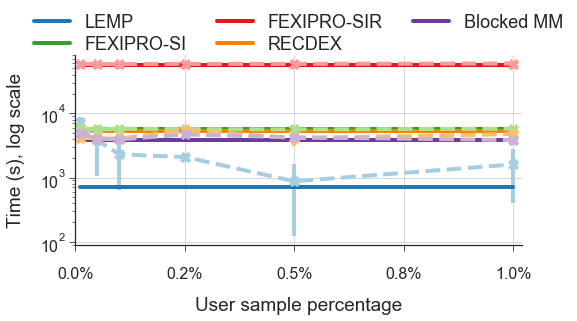

In [10]:
# custom settings for the line plots
plt.rcParams['font.size'] = 18
plt.rcParams['font.weight'] = 500
plt.rcParams['axes.titlesize'] = 19
plt.rcParams['figure.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 19
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['lines.markersize'] = 10
plt.rcParams['lines.linewidth'] = 4

runtime_estimates_plot([
                        'lemp-paper-KDD-50',
#                         'lemp-paper-Netflix-noav-50',
#                         'nomad-KDD-50-reg-1',
#                         'nomad-Netflix-50-reg-0.05',
#                         'nomad-R2-50-reg-0.000001',
                       ], lemp_estimates, lemp_df, fexipro_estimates, fexipro_df_all, simdex_estimates, simdex_df,
                        blocked_mm_esitmates, blocked_mm_df, markerstyle='X',
                      figsize=(8,3.5))

# return to normal
plt.rcParams['font.size'] = 29
plt.rcParams['font.weight'] = 500
plt.rcParams['axes.titlesize'] = 32
plt.rcParams['figure.titlesize'] = 32
plt.rcParams['axes.labelsize'] = 29
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['legend.fontsize'] = 29
plt.rcParams['lines.markersize'] = 10
plt.rcParams['lines.linewidth'] = 4

[0.0005, 0.005, 0.05, 0.5]


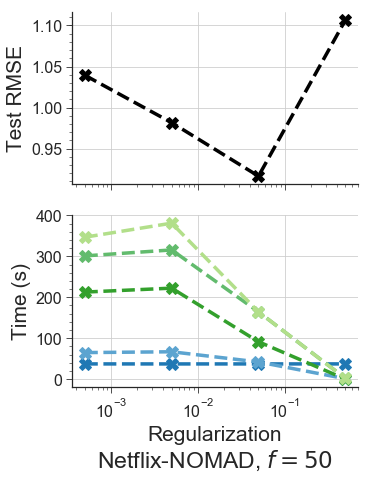

[0.0005, 0.005, 0.05, 0.5]


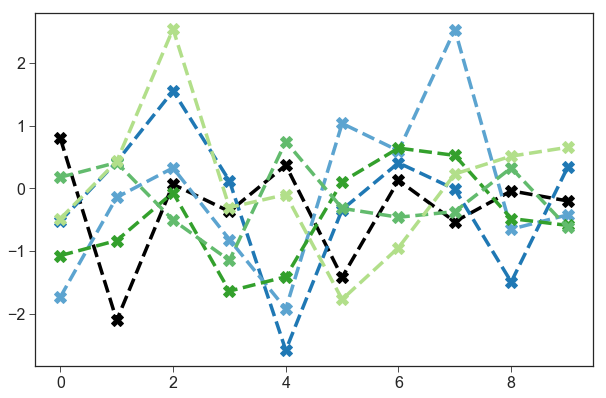

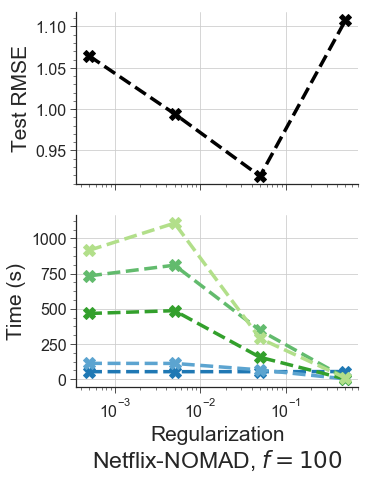

[0.0, 1e-07, 1e-06, 1e-05, 0.0001, 0.001]


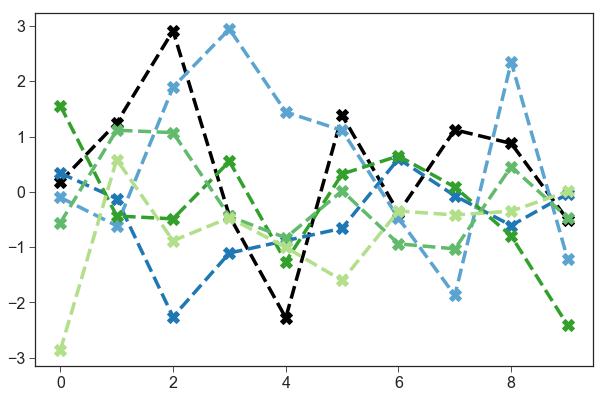

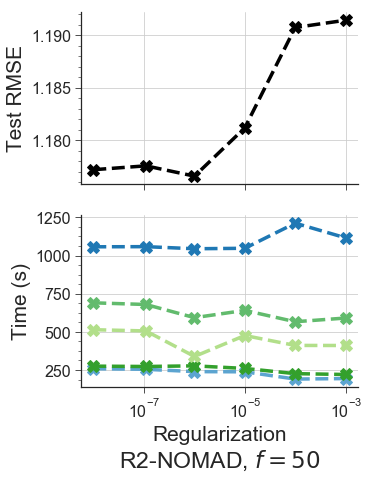

[0.0, 1e-07, 1e-06, 1e-05, 0.0001, 0.001]


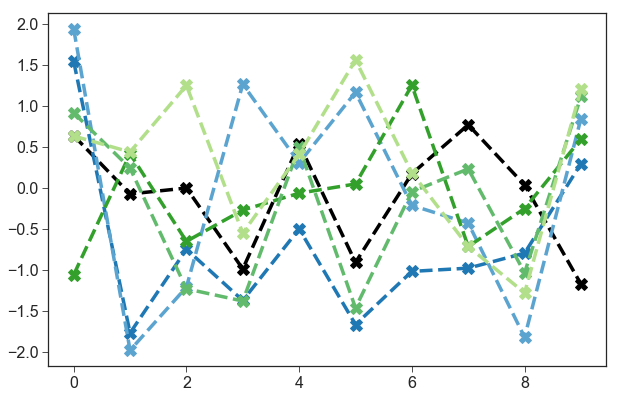

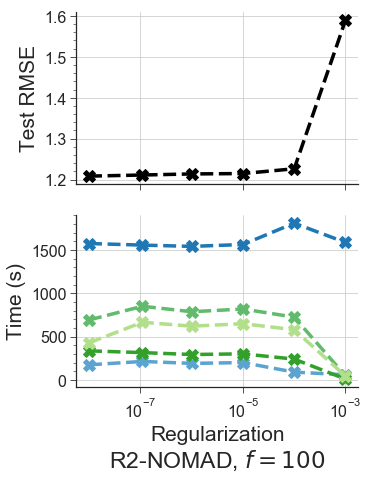

[0.001, 0.01, 0.1, 1.0]


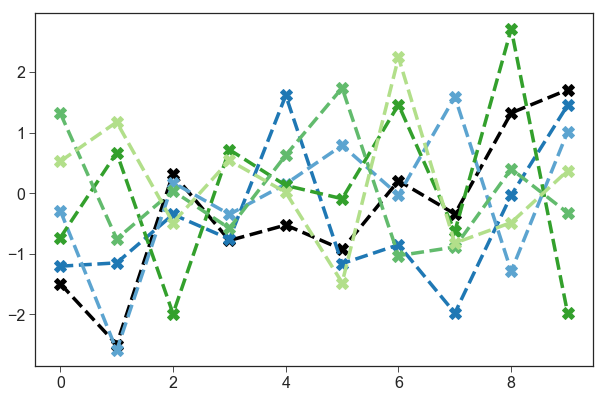

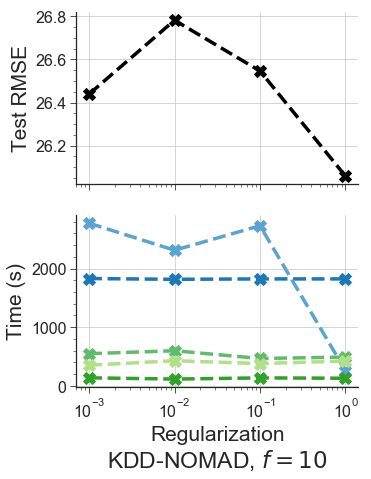

[0.0005, 0.005, 0.05, 0.5]


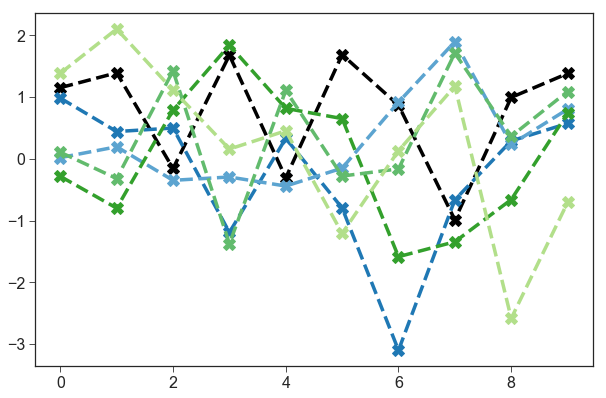

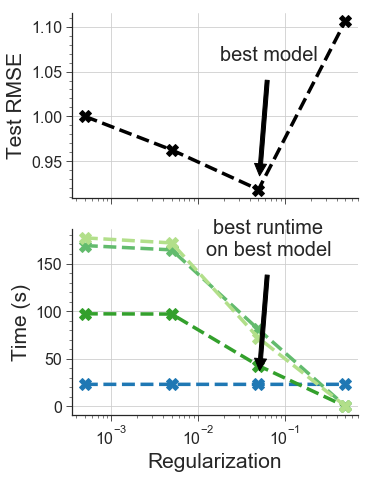

[0.0, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01]


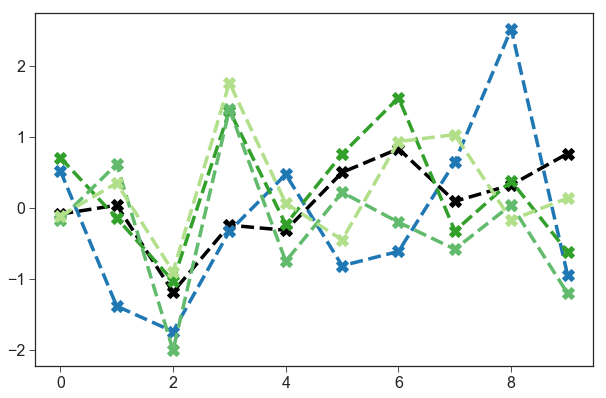

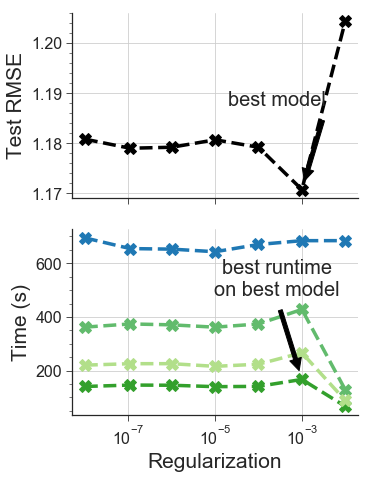

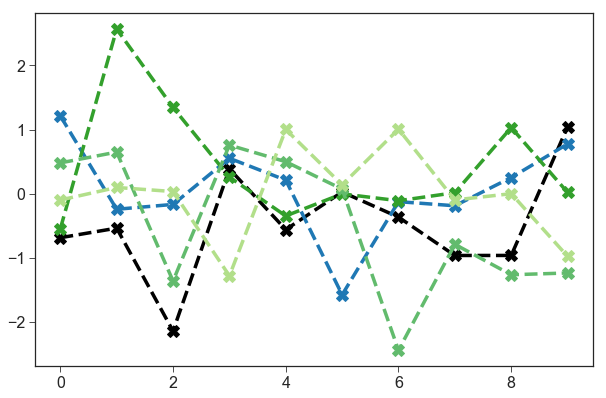

In [11]:
# custom settings for the line plots
plt.rcParams['font.size'] = 18
plt.rcParams['font.weight'] = 500
plt.rcParams['axes.titlesize'] = 23
plt.rcParams['figure.titlesize'] = 23
plt.rcParams['axes.labelsize'] = 21
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 13
plt.rcParams['lines.markersize'] = 12
plt.rcParams['lines.linewidth'] = 3.5

appetizer_models = [
    ('nomad-Netflix-25', NETFLIX_REGS, (10, 125), r'Netflix-NOMAD, $f=25$'),
    ('nomad-R2-25', R2_REGS, (-25, 80), r'R2-NOMAD, $f=25$')    
]

all_models = [
    ('nomad-Netflix-50', NETFLIX_REGS, (-5, 135), r'Netflix-NOMAD, $f=50$'),
    ('nomad-Netflix-100', NETFLIX_REGS, (-5, 135), r'Netflix-NOMAD, $f=100$'),
    ('nomad-R2-50', R2_REGS[:-1], (15, 150), r'R2-NOMAD, $f=50$'),
    ('nomad-R2-100', R2_REGS[:-1],(60, 120), r'R2-NOMAD, $f=100$'),
    ('nomad-KDD-10', KDD_REGS, (-24, 135), r'KDD-NOMAD, $f=10$'),
]
for add_simdex in [True, False]:
    models = all_models if add_simdex else appetizer_models
    _palette = rmse_reg_palette if add_simdex else appetizer_palette
    for model_prefix, regs, xy_text, title_text in models:
        _simdex_df = simdex_df if add_simdex else None
        fname = 'appetizer-' + model_prefix if not add_simdex else None
        with sns.color_palette(_palette):
            rmse_and_reg_plots(blocked_mm_df, lemp_df, rmse_df, model_prefix, regs,
                               simdex_df=_simdex_df, fexipro_df=fexipro_df, fexipro_si_df=fexipro_si_df,
                               fname=fname, figsize=(5.5, 7),
                               bbox_to_anchor=(0,0,1,1.05), title=add_simdex, title_text=title_text, 
                               y_title=-0.5, annotate=not add_simdex, xy_text=xy_text, linestyle='--', markerstyle='X',
                               include_legend=False)
            rmse_and_reg_legend(add_simdex, linestyle='--', markerstyle='X')
     
# return to normal
plt.rcParams['font.size'] = 29
plt.rcParams['font.weight'] = 500
plt.rcParams['axes.titlesize'] = 32
plt.rcParams['figure.titlesize'] = 32
plt.rcParams['axes.labelsize'] = 29
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['legend.fontsize'] = 29
plt.rcParams['lines.markersize'] = 10
plt.rcParams['lines.linewidth'] = 4        
sns.set_palette('Paired', 10)


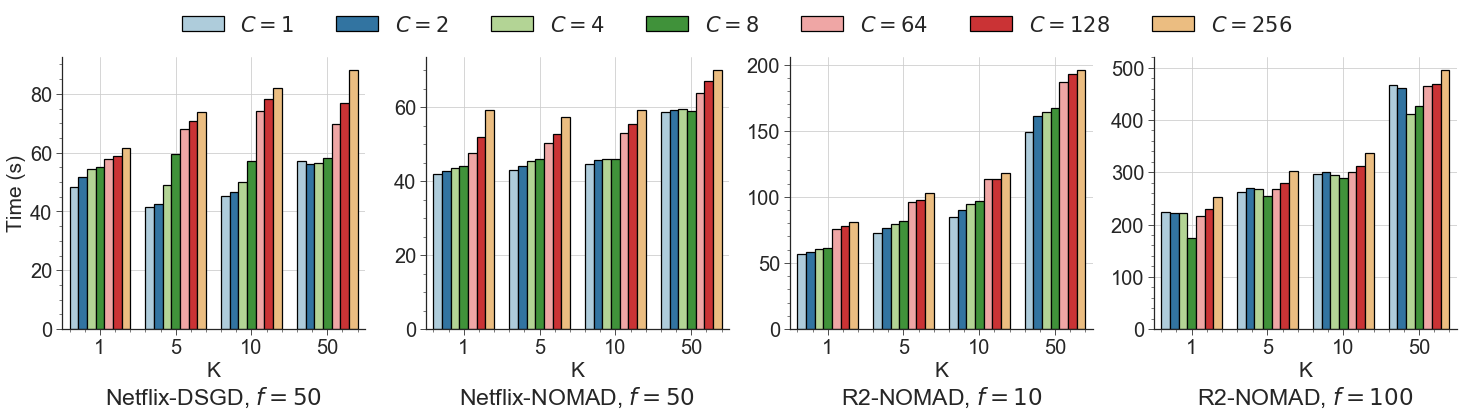

In [12]:
plt.rcParams['axes.titlesize'] = 23
plt.rcParams['legend.fontsize'] = 21
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.labelsize'] = 21
num_clusters_vs_runtime(simdex_df, ['lemp-paper-Netflix-noav-50',
                                    'nomad-Netflix-50-reg-0.05',
                                    'nomad-R2-10-reg-0.001',
                                    'nomad-R2-100-reg-0',
                                   ], figsize=(25, 5), y_title=-0.3,
                            bbox_to_anchor=(0,0,1,1.05), min_value=0, max_value=512)
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['legend.fontsize'] = 29
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['axes.labelsize'] = 29

Using 8 clusters!
Using 8 clusters!


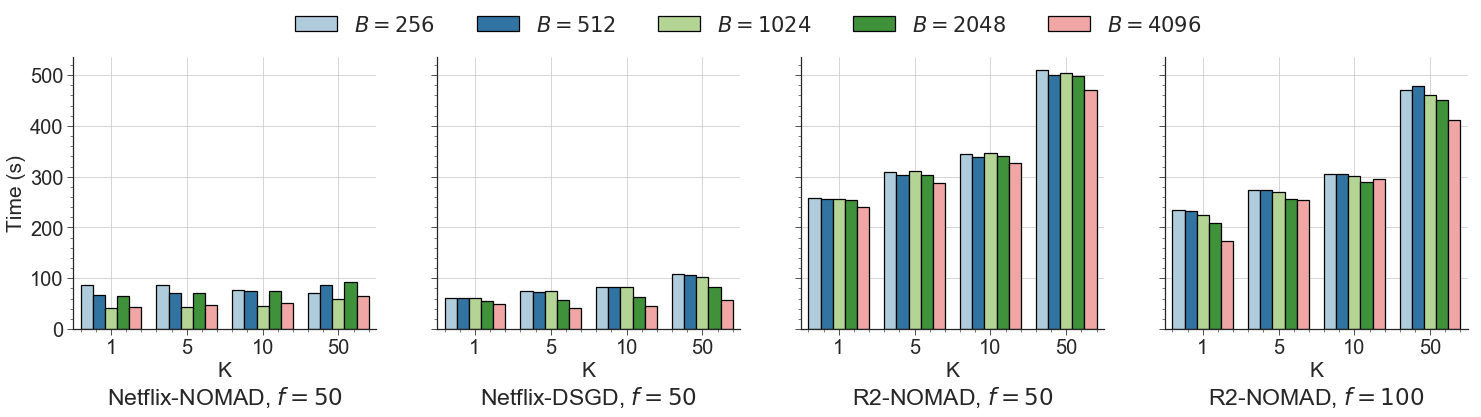

In [13]:
plt.rcParams['axes.titlesize'] = 23
plt.rcParams['legend.fontsize'] = 21
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.labelsize'] = 21

# TODO: lemp-paper-Netflix-noav-50 and nomad-R2-50-reg-0.000001 don't have all the clusters
batch_size_vs_runtime(simdex_df, [
                                  'nomad-Netflix-50-reg-0.05',
                                  'lemp-paper-Netflix-noav-50',
                                  'nomad-R2-50-reg-0.000001',
                                  'nomad-R2-100-reg-0',
                                  ], figsize=(25,5), bbox_to_anchor=(0,0,1,1.05), y_title=-0.3)
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['legend.fontsize'] = 29
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['axes.labelsize'] = 29

0.7289754288811406 480189
0.7409072532648844 480189
4.565479323752402 1823179
70.44205966623309 27684


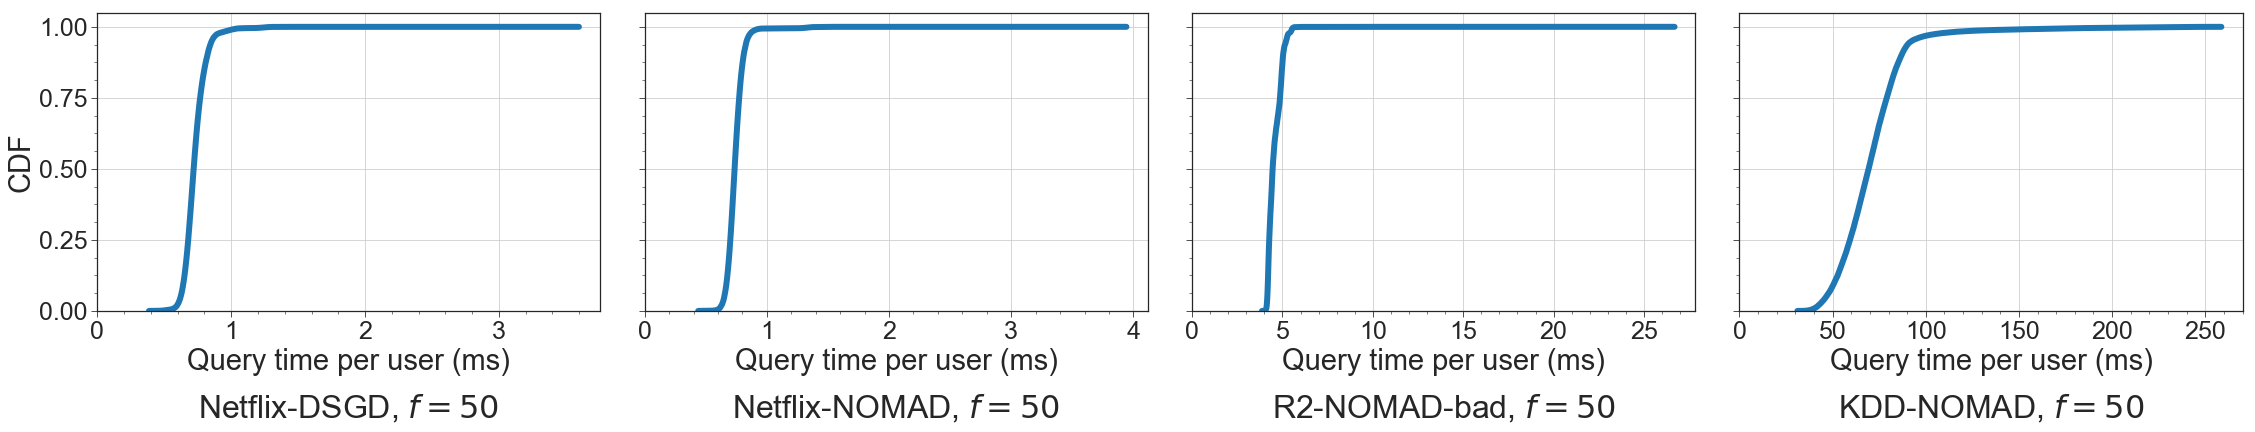

In [14]:
plt.rcParams['axes.titlesize'] = 32
plt.rcParams['lines.linewidth'] = 6
with sns.color_palette(f_u_palette):
    point_query_time(['lemp-paper-Netflix-noav-50', 'nomad-Netflix-50-reg-0.05',
                      'nomad-R2-50-reg-0.001', 'nomad-KDD-50-reg-1'],
                     csv_dir='point-query-stats/', figsize=(32, 6.5),
                     sample_fraction=1.0, y_title=-0.38)
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['lines.linewidth'] = 4

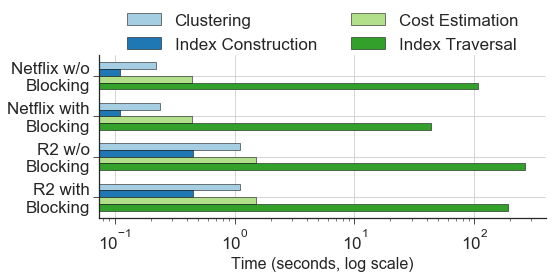

In [15]:
plt.rcParams['font.size'] = 25
plt.rcParams['axes.titlesize'] = 26
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 17
plt.rcParams['ytick.labelsize'] = 17
plt.rcParams['legend.fontsize'] = 17
plt.rcParams['lines.markersize'] = 11
plt.rcParams['lines.linewidth'] = 2.50

factor_analysis(figsize=(8,3))